In [1]:
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
target = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
import matplotlib.pyplot as plt

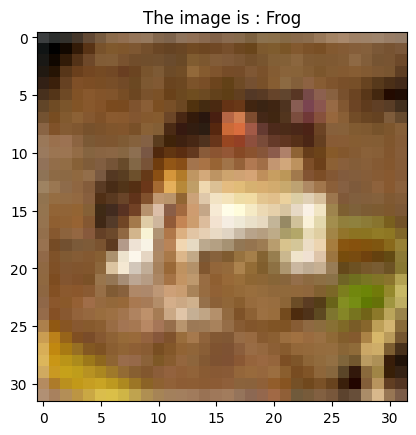

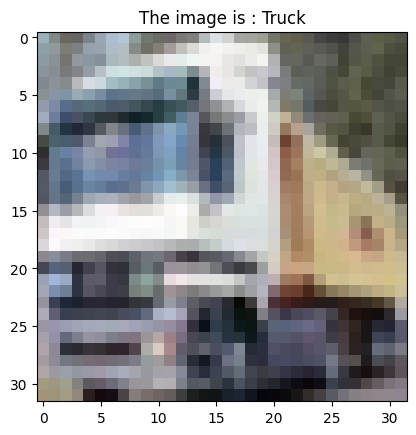

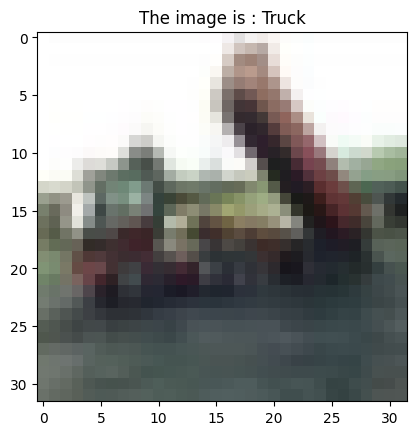

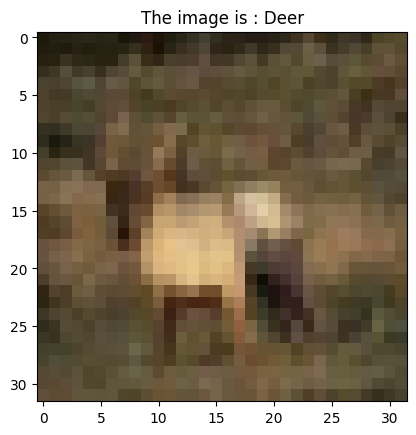

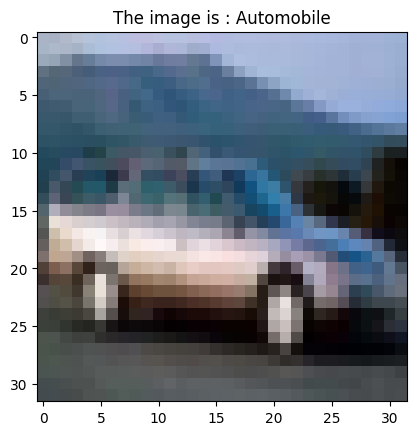

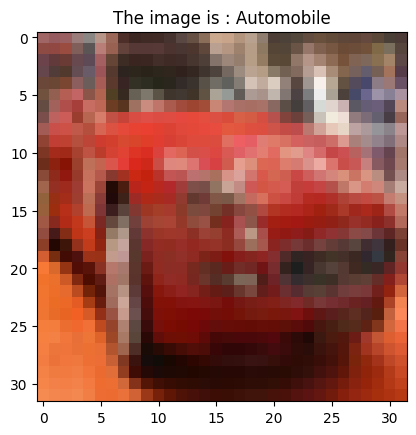

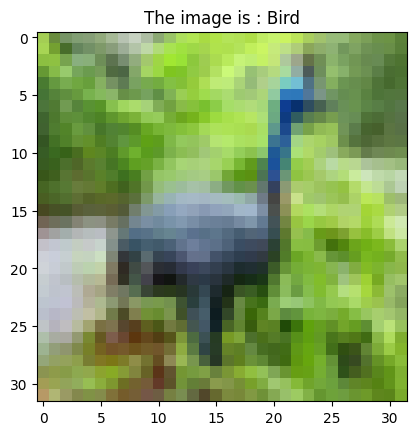

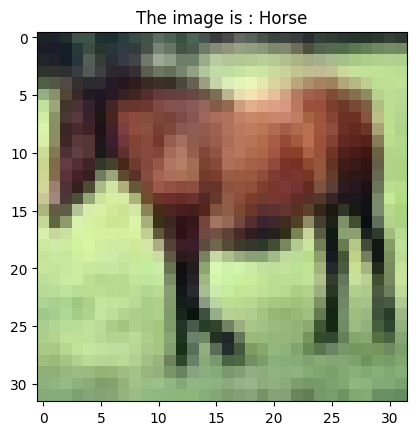

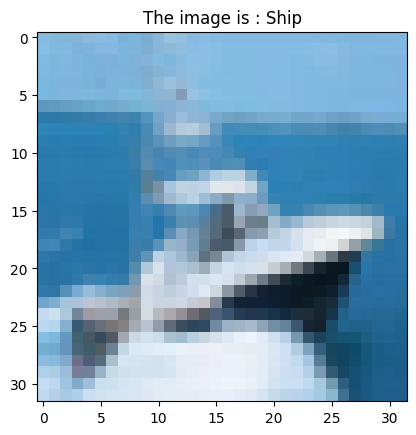

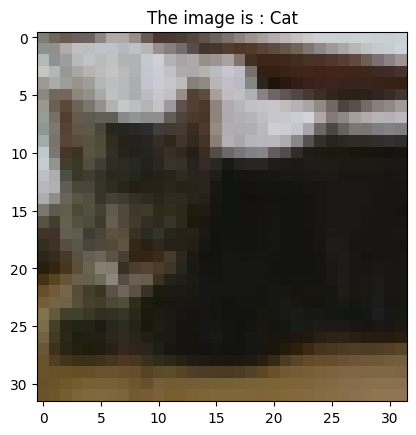

In [5]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i])
    plt.title("The image is : " + str(target[y_train[i][0]]))

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

In [9]:
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D

In [10]:
from keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [13]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=64)

Epoch 1/12
782/782 [==============================] - 28s 34ms/step - loss: 1.5690 - accuracy: 0.4282 - val_loss: 1.3545 - val_accuracy: 0.5172
Epoch 2/12
782/782 [==============================] - 28s 35ms/step - loss: 1.2148 - accuracy: 0.5688 - val_loss: 1.2354 - val_accuracy: 0.5652
Epoch 3/12
782/782 [==============================] - 28s 36ms/step - loss: 1.0588 - accuracy: 0.6286 - val_loss: 1.0627 - val_accuracy: 0.6300
Epoch 4/12
782/782 [==============================] - 30s 39ms/step - loss: 0.9696 - accuracy: 0.6593 - val_loss: 1.0101 - val_accuracy: 0.6498
Epoch 5/12
782/782 [==============================] - 34s 43ms/step - loss: 0.8954 - accuracy: 0.6852 - val_loss: 0.9425 - val_accuracy: 0.6756
Epoch 6/12
782/782 [==============================] - 36s 45ms/step - loss: 0.8366 - accuracy: 0.7062 - val_loss: 0.9544 - val_accuracy: 0.6680
Epoch 7/12
782/782 [==============================] - 33s 42ms/step - loss: 0.7869 - accuracy: 0.7243 - val_loss: 0.8917 - val_accuracy:

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8711 - accuracy: 0.7129


[0.8710572123527527, 0.7128999829292297]

In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [17]:
y_pred

array([[6.30159862e-03, 4.06000717e-03, 1.69509754e-03, ...,
        3.80274141e-03, 1.43712130e-03, 6.30271947e-03],
       [3.92714486e-04, 3.30265582e-01, 6.92499613e-09, ...,
        1.84508991e-10, 6.68950796e-01, 3.90847446e-04],
       [1.69384740e-02, 8.60037282e-02, 1.81266179e-04, ...,
        3.01824475e-04, 8.73580098e-01, 2.26697177e-02],
       ...,
       [3.06537368e-05, 1.55064856e-06, 2.35862751e-02, ...,
        5.65851294e-02, 1.05928346e-04, 1.35000564e-05],
       [3.81898582e-02, 4.87393081e-01, 1.20028578e-01, ...,
        1.52159492e-02, 3.63147963e-04, 4.38422477e-03],
       [3.28303372e-06, 1.84009448e-08, 3.42566955e-06, ...,
        9.87358212e-01, 2.17900360e-05, 9.53444783e-07]], dtype=float32)

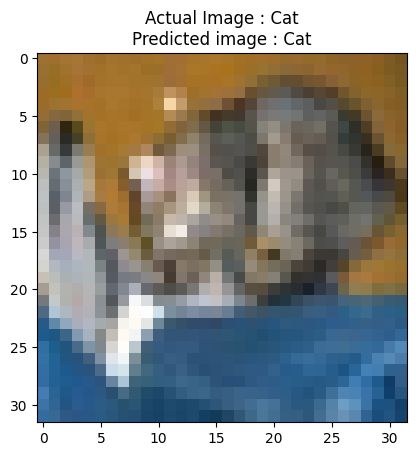

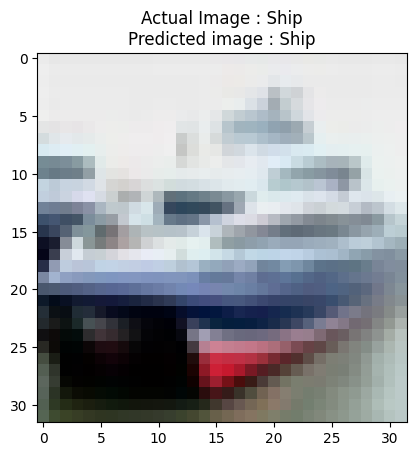

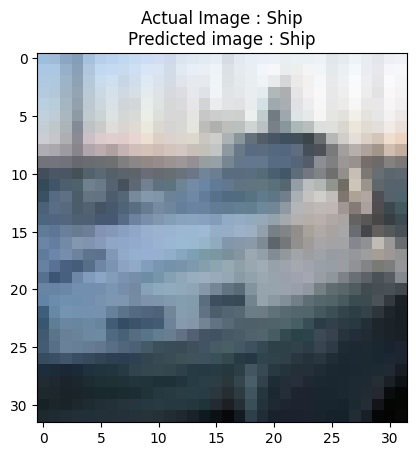

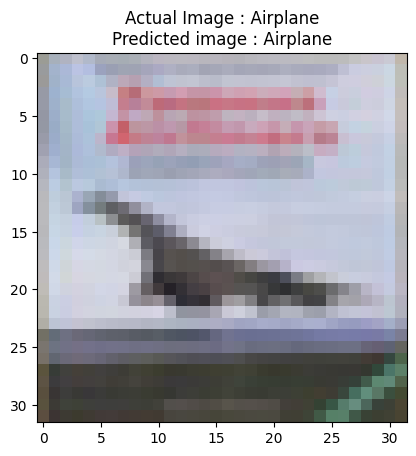

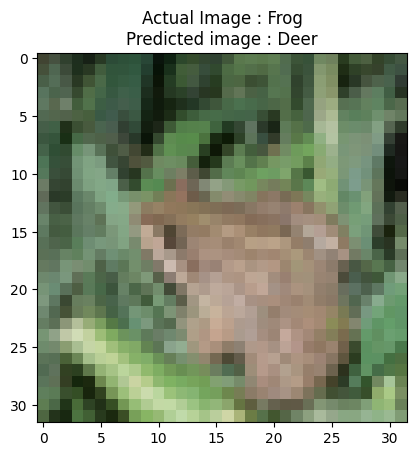

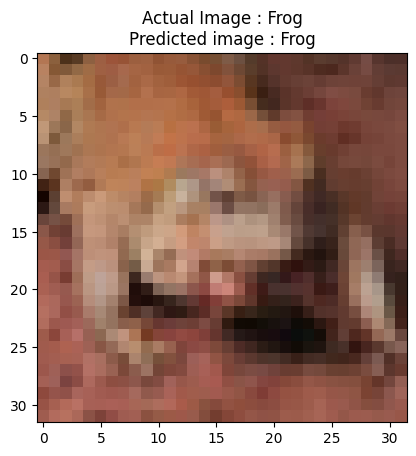

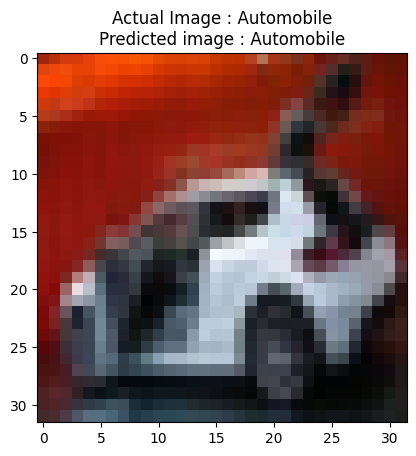

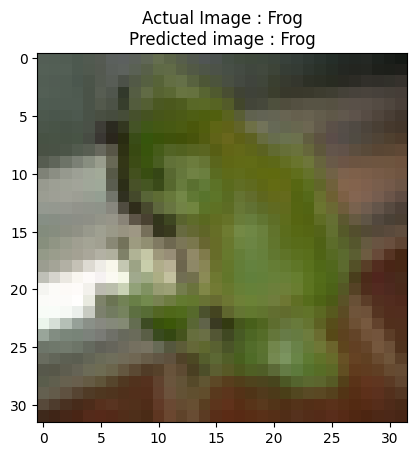

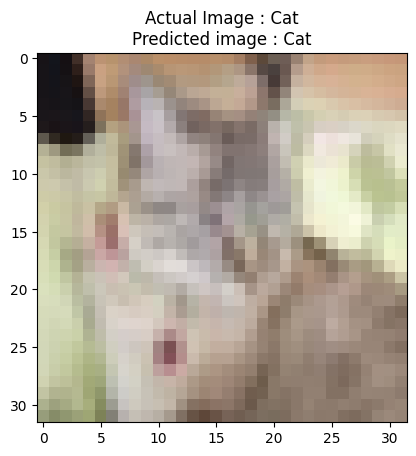

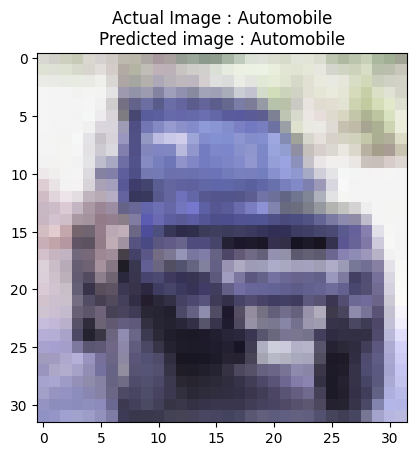

In [18]:
import numpy as np
for i in range(10):
    plt.figure()
    plt.imshow(x_test[i])
    plt.title("Actual Image : " + str(target[y_test[i][0]]) + "\nPredicted image : " + str(target[np.argmax(y_pred[i])]))

In [28]:
from sklearn.metrics import classification_report

In [32]:
pred = [np.argmax(i) for i in y_pred]

In [34]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       931
           1       0.89      0.76      0.82      1173
           2       0.59      0.65      0.62       911
           3       0.50      0.56      0.53       889
           4       0.68      0.66      0.67      1029
           5       0.55      0.67      0.61       817
           6       0.77      0.80      0.79       964
           7       0.77      0.72      0.75      1062
           8       0.86      0.75      0.80      1152
           9       0.80      0.75      0.77      1072

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.73      0.71      0.72     10000

